<a href="https://colab.research.google.com/github/brunatoloti/data-science-do-zero/blob/main/Machine%20Learning/K-Means/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning - KMeans

Importando bibliotecas

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Carregando a base de dados **iris**

In [206]:
iris = sns.load_dataset('iris')

In [207]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Separando os valores de dados e os valores de classes

In [208]:
X = iris.drop(columns='species')
X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [209]:
y = iris.species
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Convertendo valores categóricos (as classes) em numéricos

In [210]:
def converte_classe(l):
  if l == 'virginica':
    return 0
  elif l == 'setosa':
    return 1
  elif l == 'versicolor':
    return 2

In [211]:
y = y.apply(converte_classe)
y.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

Instanciando o algoritmo KMeans com 3 clusters

In [212]:
kmeans = KMeans(n_clusters = 3, init = 'random')    #Colocando para que os dados sejam agrupados em 3 clusters

In [213]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

Centroids

In [214]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

Tabela de distância

In [215]:
distance = kmeans.fit_transform(X)  #Recebe os dados que estão armazenados em X e retorna as distâncias de cada valor a um dos, nesse caso, 3 centroides
distance

array([[5.0595416 , 0.14135063, 3.41925061],
       [5.11494335, 0.44763825, 3.39857426],
       [5.27935534, 0.4171091 , 3.56935666],
       [5.15358977, 0.52533799, 3.42240962],
       [5.10433388, 0.18862662, 3.46726403],
       [4.68148797, 0.67703767, 3.14673162],
       [5.21147652, 0.4151867 , 3.51650264],
       [5.00252706, 0.06618157, 3.33654987],
       [5.32798107, 0.80745278, 3.57233779],
       [5.06790865, 0.37627118, 3.3583767 ],
       [4.89806763, 0.4824728 , 3.32449131],
       [4.9966845 , 0.25373214, 3.31126872],
       [5.19103612, 0.50077939, 3.46661272],
       [5.65173594, 0.91322505, 3.90578362],
       [5.10804455, 1.01409073, 3.646649  ],
       [4.88564095, 1.20481534, 3.49427881],
       [5.03090587, 0.6542018 , 3.495248  ],
       [5.02342022, 0.1441527 , 3.38444981],
       [4.61792995, 0.82436642, 3.11245944],
       [4.97213426, 0.38933276, 3.37738931],
       [4.6955761 , 0.46344363, 3.07471224],
       [4.9236821 , 0.3286031 , 3.31506588],
       [5.

In [216]:
distance[0]   #Distâncias do primeiro dado de X em relação a cada cluster

array([5.0595416 , 0.14135063, 3.41925061])

Visualizando valores da distância do primeiro dado de X em relação a cada cluster

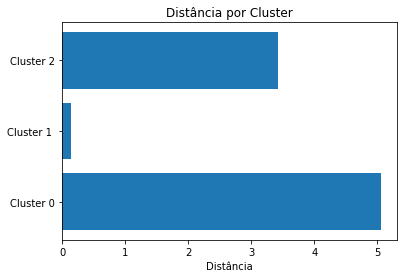

In [217]:
x = ['Cluster 0', 'Cluster 1 ', 'Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Cluster')
plt.show()

Imprimindo rótulos

In [218]:
labels = kmeans.labels_

In [219]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Visualizando os centroids

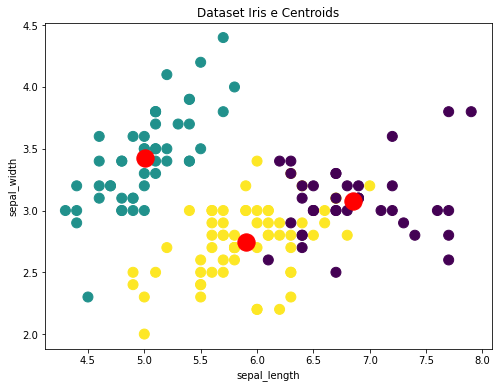

In [220]:
plt.figure(figsize=(8,6))
plt.scatter(X['sepal_length'], X['sepal_width'], s=100, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

Agrupando novos dados

In [221]:
dados_novos = [
               [4.12, 3.4, 1.6, 0.7],
               [5.2, 5.8, 5.2, 6.7],
               [3.1, 3.5, 3.3, 3.0]
              ]

In [222]:
#Agrupamos novos dados a partir do método predict() aplicado a nossa variável kmeans que já tem nosso modelo treinado
kmeans.predict(dados_novos)

array([1, 0, 2], dtype=int32)

Visualizando os resultados

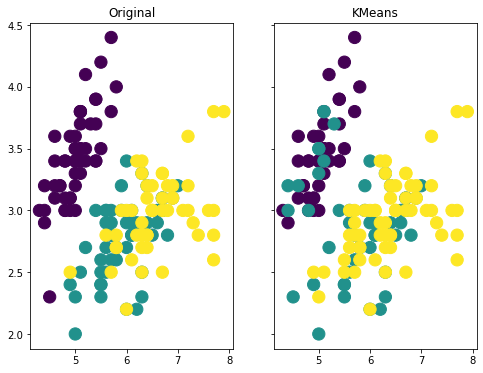

In [223]:
f, (ax1, ax2) = plt.subplots( 1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['sepal_length'], X['sepal_width'], s=150, c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X['sepal_length'], X['sepal_width'], s=150, c=sorted(kmeans.labels_))

Estimando o valor do parâmetro K - Método Elbow

In [224]:
wcss = []   #lista vazia que armazenará as somas dos erros quadráticos

for i in range(1, 11):  #10 iterações
  kmeans2 = KMeans(n_clusters=i, init='random')
  kmeans2.fit(X)
  print(i, kmeans2.inertia_)    #atributo inertia_ faz a somatória dos erros quadraticos
  wcss.append(kmeans2.inertia_)

1 681.3706
2 152.34795176035792
3 78.85144142614601
4 57.25600931571815
5 46.44618205128205
6 39.066035353535355
7 37.08482343358396
8 32.13061369332422
9 28.826498419021643
10 27.04414074960128


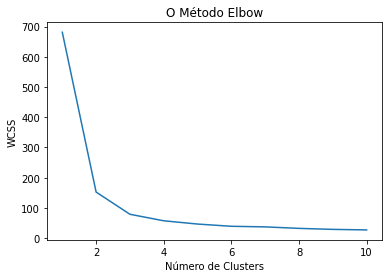

In [225]:
plt.plot(range(1, 11), wcss)
plt.title('O Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Técnicas de Validação - Matriz de Confusão

In [226]:
print(pd.crosstab(y, kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        36   0  14   50
1         0  50   0   50
2         2   0  48   50
All      38  50  62  150


Técnicas de Validação - Métricas de Classificação

In [228]:
from sklearn import metrics

clusters = ['Cluster 2' , 'Cluster 1', 'Cluster 0']
print(metrics.classification_report(y, kmeans.labels_, target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.95      0.72      0.82        50
   Cluster 1       1.00      1.00      1.00        50
   Cluster 0       0.77      0.96      0.86        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

